## Create your own custom color palette

Let's say you like 2 colors and feel that they would be perfect for your plot. You can create a custom color palette using these 2 colors and use it in your plot. 

```python
from matplotlib.colors import LinearSegmentedColormap

my_colors = ['#2a9d8f', '#e76f51']
cmap = LinearSegmentedColormap.from_list('my_cmap_name', my_colors)
```

<div align="center">
  <img src="with-spines.png" alt="Low Resolution" width="45%" />
  <img src="without-spines.png" alt="High Resolution" width="45%" />
</div>

### How to use:

```python
ax.spines[['top', 'right']].set_visible(False)
```


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text

url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/cancer_rate.csv"
cancer_rates = pd.read_csv(url)

world = gpd.read_file(
    "../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[world['CONTINENT'] == 'Europe']
data = europe.merge(cancer_rates, how='left',
                    left_on='NAME', right_on='Country')
data.dropna(subset=['Cancer'], inplace=True)
data['Cancer'] = round(data['Cancer']*100, 1)

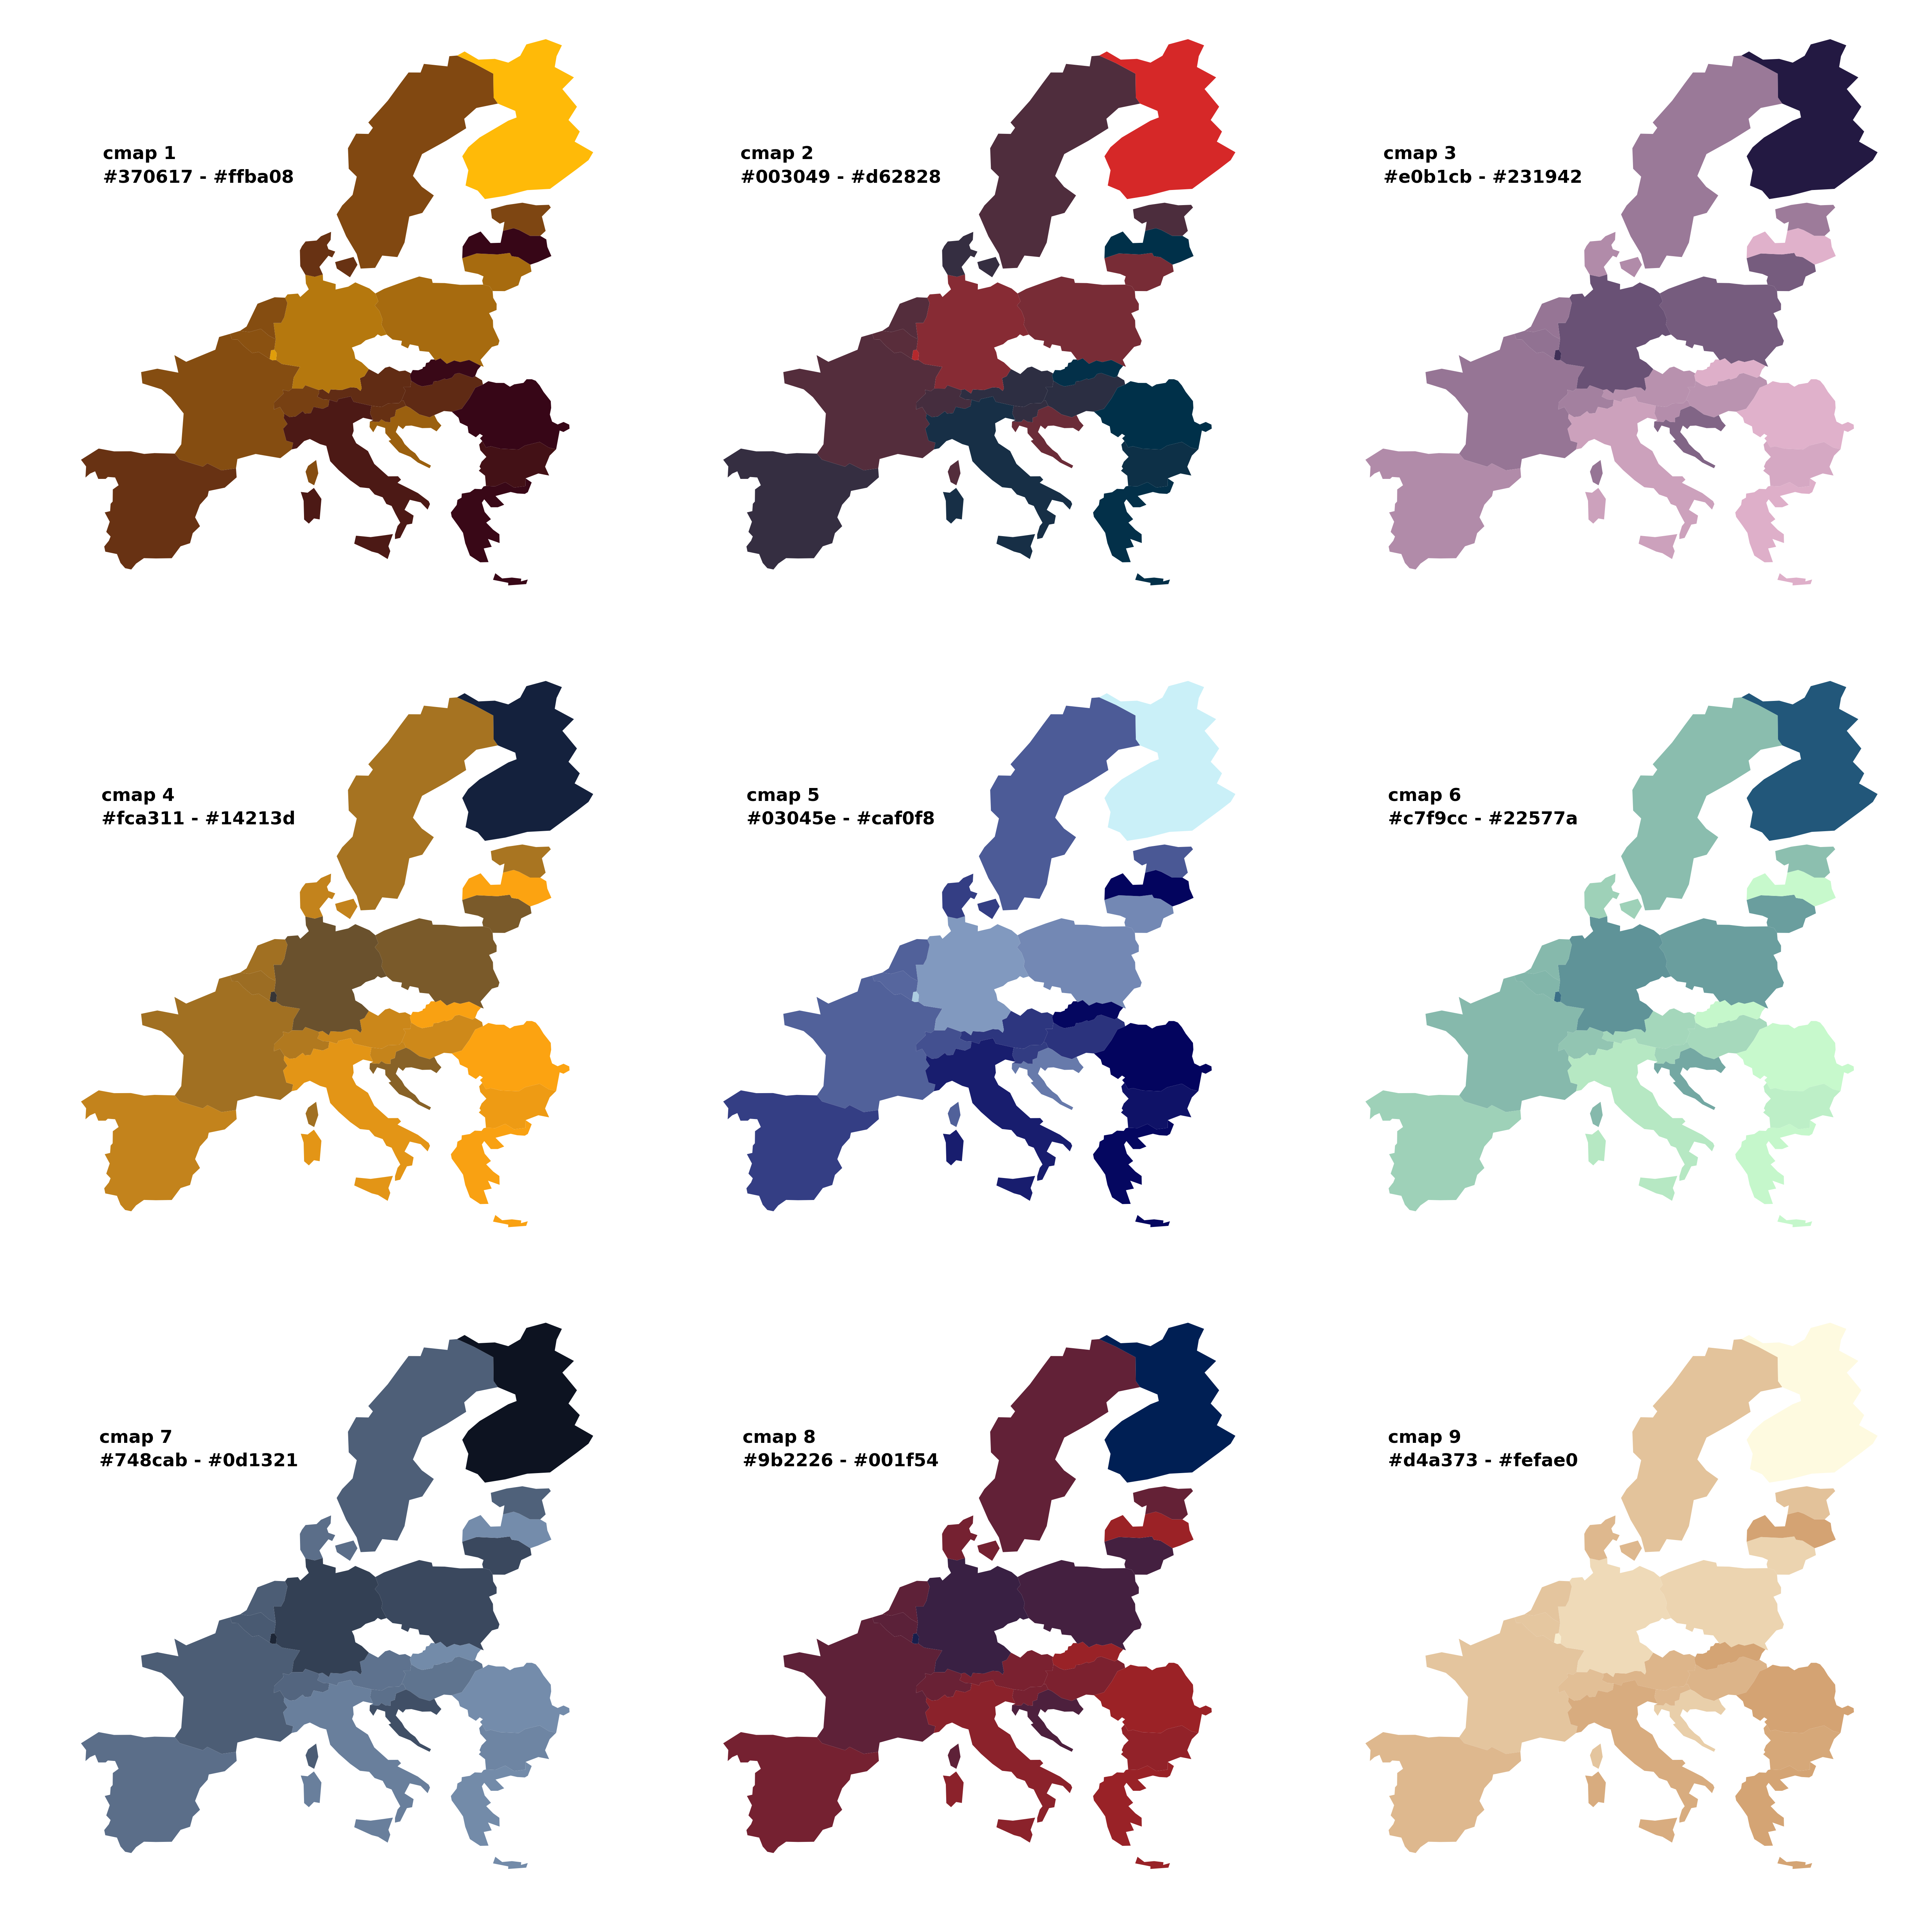

In [2]:
# initialize the figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18), dpi=300)

# Define multiple custom colormaps and their color pairs
colormap_data = [
    ('cmap 1', ['#370617', '#ffba08']),
    ('cmap 2', ['#003049', '#d62828']),
    ('cmap 3', ['#e0b1cb', '#231942']),
    ('cmap 4', ['#fca311', '#14213d']),
    ('cmap 5', ['#03045e', '#caf0f8']),
    ('cmap 6', ['#c7f9cc', '#22577a']),
    ('cmap 7', ['#748cab', '#0d1321']),
    ('cmap 8', ['#9b2226', '#001f54']),
    ('cmap 9', ['#d4a373', '#fefae0'])
]

# Create colormaps
colormaps = [LinearSegmentedColormap.from_list(name, colors) for name, colors in colormap_data]

# Plot the data on each subplot with different colormaps
for ax, (name, colors), cmap in zip(axs.flat, colormap_data, colormaps):
    ax.set_xlim(-15, 35)
    ax.set_ylim(32, 72)
    ax.axis('off')
    data.plot(column='Cancer', ax=ax, cmap=cmap)

    # Add title with color names
    cmap_colors = f"{colors[0]} - {colors[-1]}"
    ax_text(0, 62, f'{name}\n{cmap_colors}', color='black', fontsize=12, ha='center', va='center', ax=ax,
            transform=ax.transAxes, fontweight='bold')

# display the plot
plt.tight_layout()
plt.savefig('cancer_rate_grid.png', dpi=300, bbox_inches='tight')
plt.show()
